# Clustering Toronto Neighbourhoods
#### Part 3: Clustering Metrics

This notebook is used to analyse the goodness of fit of the data to k means models for various numbers of clusters using Silhouette analysis. 

## Load libraries

In [1]:
import pandas as pd # Data structures

import matplotlib.pyplot as plt # Plotting simple maps
from sklearn.preprocessing import MinMaxScaler # Min Max Scaling for features
from sklearn.cluster import KMeans # KMeans clustering model
from sklearn.metrics import silhouette_score # silhouette score used for helping determine K 
from yellowbrick.cluster import SilhouetteVisualizer # Creating Silhouette plots

## Load Datasets

Here, the geographical information created in part 1 and the venue categories information created in part 2 are loaded.

In [2]:
# Toronto Neighbourhoods geographical information
tor_boro = pd.read_csv('tor_boro.csv')  

# Count of venue catgeories within 500, 1000 and 2000m radius of Toronto Neighbourhoods
# Strored in a dict for ease of use
R = [500, 1000, 2000]
toronto_venues = {r:pd.read_csv('toronto_venues_'+str(r)+'.csv') for r in R}

## Analysing Neighbourhoods

Now that we have the 39 Toronto neighbourhoods with a count of nearby venues, grouped by category, we can proceed to cluster the Neighbourhoods.

First we scale the venue category counts.

In [3]:
scaled_features = {r:MinMaxScaler().fit_transform(toronto_venues[r][list(toronto_venues[r].columns.values)[1:]]) for r in R}

## Silhouette Coefficients

The higher the value of the silhouette coefficient or score, the better each data points 'fits' to its cluster and 'does not fit' to the other clusters (i.e. similarity within cluster/against dissimilarity to other clusters).

The sillhoutte coefficient calclulated below is the mean of the silhouette coefficient or score of each data point. Therefore, these plots are a type of 'goodness of fit test' of the overall kmeans model. 

Sillhoutte coefficients take values between -1 and 1. For an data point with a score of 1, it would indicate optimal clustering. A value of 0 indicates that observation lies exactly between clusters, while a negative values indicates it is likely in the wrong cluster. 

For more information see the sci-kit learn [docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

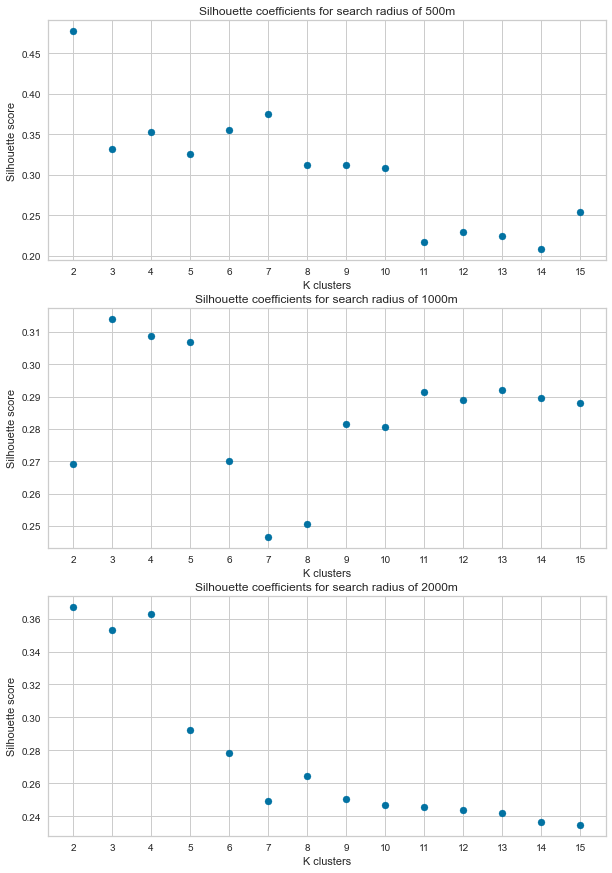

In [4]:
# The range of k values tested for
K = range(2,16)

# Create a list of K-Means cluster algorithms for the scaled vlaues over the range of ks
kmeans = {r:[KMeans(n_clusters=k, random_state=0).fit(scaled_features[r]) for k in K] for r in R}

# Create a list of silhoutte scores for the K-Means cluster algorithms over the range of ks
sil = {r:[silhouette_score(scaled_features[r], model.predict(scaled_features[r]))
          for model in kmeans[r]] for r in R}

plt.rcParams["figure.figsize"] = (10,15)

ax1 = plt.subplot(311)
ax1.set_title('Silhouette coefficients for search radius of 500m')
ax1.scatter(K,sil[500])

ax2 = plt.subplot(312)
ax2.set_title('Silhouette coefficients for search radius of 1000m')
ax2.scatter(K,sil[1000])

ax3 = plt.subplot(313)
ax3.set_title('Silhouette coefficients for search radius of 2000m')
ax3.scatter(K,sil[2000])

for ax in (ax1,ax2,ax3):
    ax.set(xlabel='K clusters', ylabel='Silhouette score',xticks=K)
    ax.grid(which='minor')

From the above plots we can see the closeness of fit for the three search radius for a range of 2 to 15 clusters. 

As noted above, the higher the value of K, the better the data points fit the clusters. 

For 500 metres a 2 cluster solution has the best fit. In fact, this is the best fit of all of the models. We also note that for this search radius, we have relatively high silhouette coefficients for values of K up to 10. The high coefficients for this search radius are possibly due to the Neighbourhoods being less likely to overalap search areas and share venues, therefore being more diverse and easy to cluster. 

For 1000 metres, 3 to 5 clusters appears to be optimal. However, we do note that these values are quite low compared to other radii.  

In the 2000m plot we see again the 2 clusters yields the highest coefficient score. 3 and 4 cluster solutions also appear to be relatively strong, with a sharp drop off after this point.

As the silhouette coefficient of the model is simply the mean of the silhouette coefficients of all the individual data points, it may be skewed based on some extremely well or poorly fitted data points.

We may have a high silhouette coefficient for a model as a result of a majority certain clusters or data points fitting really well together, while some clusters or data points fit really poorly. 

Silhouette plots can be used to visualise the silhouette coefficients of all individual data points, as well as the cluster sizes.

Ideally, we want clusters of similar sizes, with the majority of data points fitting consitently well. 

Below we have produced Silhouette plots of some relvant values of K for our search radii. The plots have also been saved as .png files. 

## Silhouette Plots

### 500m search radius

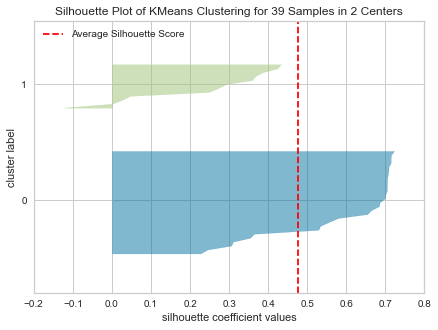

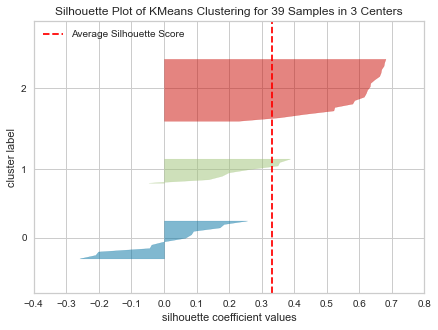

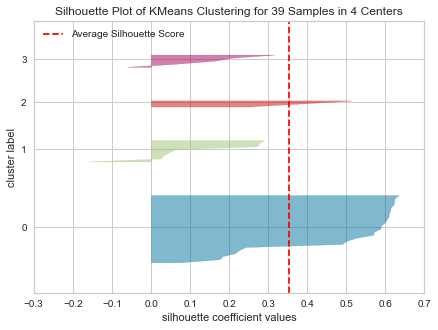

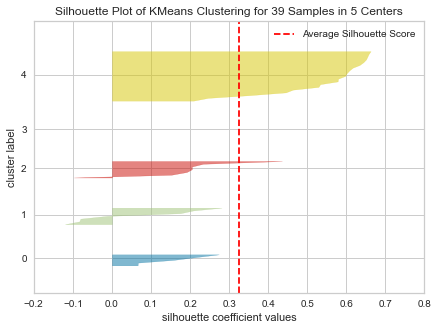

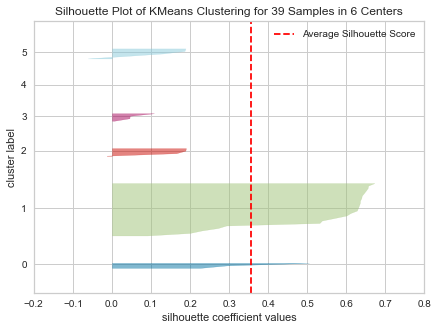

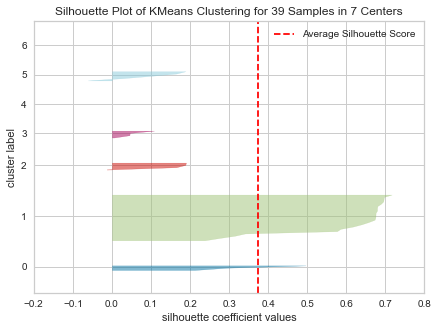

In [5]:
K = range(2,8)

plt.rcParams["figure.figsize"] = (7,5)

for k in K:
    fig = plt.figure()
    visualizers = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=0), colors='yellowbrick')
    visualizers.fit(scaled_features[500])
    visualizers.show(outpath="silhouette_plots/500m/silhouette_plot_R=500m_&_K="+str(k)+".png")

### 1000m search radius

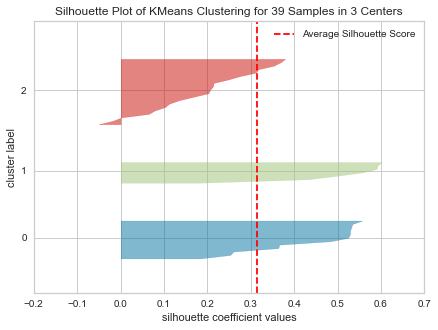

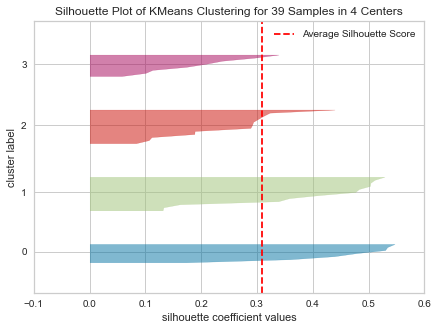

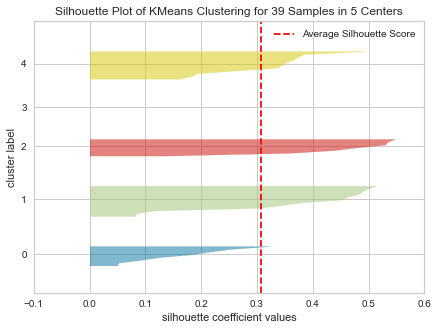

In [6]:
K = range(3,6)

plt.rcParams["figure.figsize"] = (7,5)

for k in K:
    fig = plt.figure()
    visualizers = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=0), colors='yellowbrick')
    visualizers.fit(scaled_features[1000])
    visualizers.show(outpath="silhouette_plots/1000m/silhouette_plot_R=1000m_&_K="+str(k)+".png")

### 2000m search radius

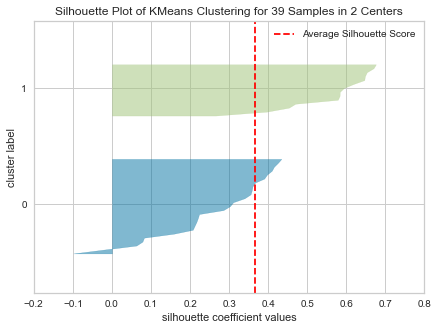

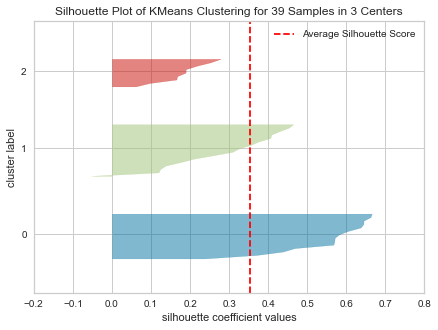

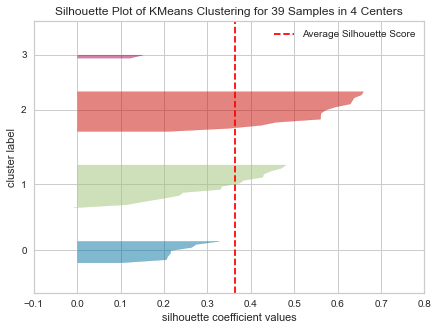

In [7]:
K = range(2,5)

plt.rcParams["figure.figsize"] = (7,5)

for k in K:
    fig = plt.figure()
    visualizers = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=0), colors='yellowbrick')
    visualizers.fit(scaled_features[2000])
    visualizers.show(outpath="silhouette_plots/2000m/silhouette_plot_R=2000m_&_K="+str(k)+".png")

## Conclusion



The Silhouette plots for the 500 metre search radius did not yield particularly encouraging results. We notice the high mean value is a result of the similarity of a large section of these data points. This cluster is represented by the thickest and longest spike, which can be seen and remains significant in nearly all of the 500 metre plots. Further investigation of this shows that this is a result of the outer Toronto having very few search results. This can be seen in the Mapping Clusters and conclusion section.

Despite the coefficient bias to the outer cluster, we note that for this radius 2 clusters still appears to be the most optimal solution. We should also note that from 5 clusters and above, outlier clusters and small clusters of 2 or 3 neighbourhoods begin to become common, meaning these solutions possibly aren't ideal either. 

Given a 1000 metre search radius the data appears to be dispersed somewhat better as we have yielded clusters of more consistant sizes and 'goodness of fit' values. However, there are still some data points which show very little correlation to their clusters and the overall coefficient mean is far from ideal. The 4 cluster solution seems like the best fit with no real outliers and good evenly dispersed clusters.

The silhouette plots for the 2000 metre search radius confirm that increasing the number of clusters above 2 only results in less well fitting clusters, as suggested by the mean silhouette coefficient values. Similar to the 500m radius clusters, this radius appears to benifit from an increased coeffiecient mean due to the similarity of one set of data points. Further inspections of these points shows that these are the inner Neighbourhoods (see the map in part 4). This is predictable as many of these neighbourhoods are within the search radius of each other and will likely share nearby venues in the result set.